In [1]:

#import neccassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,stats
import statsmodels.api as sm


In [2]:
#read data sheets

solar_df = pd.read_csv("solar_sensor_data.csv")
weather_df = pd.read_csv("weather_sensor_data.csv")
solar_A_df = pd.read_csv('solar_sensor_A_location.csv')
solar_B_df = pd.read_csv('solar_sensor_B_location.csv')

weather_A_df = pd.read_csv('weather_sensor_A_location.csv')
weather_B_df = pd.read_csv('weather_sensor_B_location.csv')


In [3]:
weather_df.shape

(6441, 5)

In [4]:
solar_df.head()

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,A,15-05-2020 00:00,sensor 1,0.0,0.0,0.0,6259559.0
1,A,15-05-2020 00:00,sensor 2,0.0,0.0,0.0,6183645.0
2,A,15-05-2020 00:00,sensor 3,0.0,0.0,0.0,6987759.0
3,A,15-05-2020 00:00,sensor 5,0.0,0.0,0.0,7602960.0
4,A,15-05-2020 00:00,sensor 12,0.0,0.0,0.0,7158964.0


In [5]:
solar_df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,136476.000000,136476.000000,136476.000000,1.364760e+05
mean,1708.541497,274.803511,3295.433783,3.303821e+08
std,3222.181273,380.182569,3035.294425,6.085705e+08
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,28.321429,6.520020e+06
50%,6.050000,3.506905,2834.803572,7.269333e+06
75%,1155.788333,532.673333,5992.000000,2.826096e+08
max,14471.125000,1410.950000,9873.000000,2.247916e+09


In [6]:
weather_df.describe()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,6441.000000,6441.000000,6441.000000
mean,26.815672,31.941762,0.230551
std,3.938901,11.835033,0.306877
min,20.398505,18.140415,0.000000
25%,23.662696,22.429024,0.000000
50%,25.954460,26.394380,0.022282
75%,29.355584,40.821388,0.443340
max,39.181638,66.635953,1.221652


In [7]:
weather_df.head()

,LOCATION,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,A,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,A,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,A,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,A,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,A,2020-05-15 01:00:00,24.621525,22.165423,0.0


In [8]:
sesnor_unique = solar_df["SENSOR_ID"].unique()
sesnor_unique


array(['sensor 1', 'sensor 2', 'sensor 3', 'sensor 5', 'sensor 12',
       'sensor 19', 'sensor 20', 'sensor 23', 'sensor 24', 'sensor 25',
       'sensor 26', 'sensor 27', 'sensor 28', 'sensor 32', 'sensor 34',
       'sensor 36', 'sensor 37', 'sensor 39', 'sensor 42', 'sensor 43',
       'sensor 44', 'sensor 22', 'sensor 4', 'sensor 6', 'sensor 7',
       'sensor 8', 'sensor 9', 'sensor 10', 'sensor 11', 'sensor 13',
       'sensor 14', 'sensor 15', 'sensor 16', 'sensor 17', 'sensor 18',
       'sensor 21', 'sensor 29', 'sensor 30', 'sensor 31', 'sensor 33',
       'sensor 35', 'sensor 38', 'sensor 40', 'sensor 41'], dtype=object)

In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOCATION             6441 non-null   object 
 1   DATE_TIME            6441 non-null   object 
 2   AMBIENT_TEMPERATURE  6441 non-null   float64
 3   MODULE_TEMPERATURE   6441 non-null   float64
 4   IRRADIATION          6441 non-null   float64
dtypes: float64(3), object(2)
memory usage: 251.7+ KB


In [10]:
solar_df['DATE_TIME'].isna().sum()

0

In [11]:
solar_df.head()

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,A,15-05-2020 00:00,sensor 1,0.0,0.0,0.0,6259559.0
1,A,15-05-2020 00:00,sensor 2,0.0,0.0,0.0,6183645.0
2,A,15-05-2020 00:00,sensor 3,0.0,0.0,0.0,6987759.0
3,A,15-05-2020 00:00,sensor 5,0.0,0.0,0.0,7602960.0
4,A,15-05-2020 00:00,sensor 12,0.0,0.0,0.0,7158964.0


In [12]:
solar_df['SENSOR_ID'].nunique()

44

In [13]:
# 1. Convert 'datetime_column' to datetime type (if it's not already)


# 2. Create the full expected date range (from May 1 to June 30, 15-minute intervals)
start_date = '2020-05-15'
end_date = '2020-06-17'
expected_range = pd.date_range(start=start_date, end=end_date, freq='15T')

# 3. Check for missing values
missing_dates = expected_range.difference(weather_df['DATE_TIME'])

# Print missing datetime values (if any)
print("Missing Datetime Values:")
print(missing_dates)


Missing Datetime Values:
DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:15:00',
               '2020-05-15 00:30:00', '2020-05-15 00:45:00',
               '2020-05-15 01:00:00', '2020-05-15 01:15:00',
               '2020-05-15 01:30:00', '2020-05-15 01:45:00',
               '2020-05-15 02:00:00', '2020-05-15 02:15:00',
               ...
               '2020-06-16 21:45:00', '2020-06-16 22:00:00',
               '2020-06-16 22:15:00', '2020-06-16 22:30:00',
               '2020-06-16 22:45:00', '2020-06-16 23:00:00',
               '2020-06-16 23:15:00', '2020-06-16 23:30:00',
               '2020-06-16 23:45:00', '2020-06-17 00:00:00'],
              dtype='datetime64[ns]', length=3169, freq='15min')


C:\Users\User\AppData\Local\Temp\ipykernel_14004\1930745113.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  expected_range = pd.date_range(start=start_date, end=end_date, freq='15T')


### Data Transformation

In [14]:
solar_df.loc[solar_df['LOCATION'] == 'A', 'DATE_TIME'] = pd.to_datetime(
    solar_df.loc[solar_df['LOCATION'] == 'A', 'DATE_TIME'])

C:\Users\User\AppData\Local\Temp\ipykernel_14004\1257633318.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  solar_df.loc[solar_df['LOCATION'] == 'A', 'DATE_TIME'] = pd.to_datetime(


In [15]:
solar_df.loc[solar_df['LOCATION'] == 'B', 'DATE_TIME'] = pd.to_datetime(
    solar_df.loc[solar_df['LOCATION'] == 'B', 'DATE_TIME'])

In [16]:
solar_df[solar_df['LOCATION']=="B"].sample(10)

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
104261,B,2020-06-02 17:30:00,sensor 30,355.264286,349.214286,6985.785714,1.660109e+09
93930,B,2020-05-28 15:15:00,sensor 7,898.493333,878.986667,7645.533333,2.247816e+09
81803,B,2020-05-21 14:45:00,sensor 15,978.673333,957.040000,2979.600000,1.348384e+09
129297,B,2020-06-14 14:15:00,sensor 30,0.000000,0.000000,1745.000000,1.660174e+09
100532,B,2020-05-31 23:00:00,sensor 9,0.000000,0.000000,6664.000000,2.007802e+07
121832,B,2020-06-11 01:30:00,sensor 14,0.000000,0.000000,2618.000000,1.117109e+08
105887,B,2020-06-03 12:00:00,sensor 21,1098.550000,1072.714286,2651.428571,1.818410e+08
104773,B,2020-06-02 23:15:00,sensor 41,0.000000,0.000000,5480.000000,2.092495e+08
68952,B,2020-05-15 01:45:00,sensor 40,0.000000,0.000000,9166.000000,1.066566e+08
86910,B,2020-05-24 13:45:00,sensor 7,1131.186667,1104.913333,6364.800000,2.247784e+09


In [17]:
solar_df[solar_df['LOCATION']=="A"].sample(10)

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
61595,A,2020-06-14 13:45:00,sensor 26,0.0,0.0,2378.0,6520020.0
66805,A,2020-06-17 01:00:00,sensor 22,0.0,0.0,0.0,7419556.0
25143,A,2020-05-27 20:45:00,sensor 19,0.0,0.0,6763.0,7304378.0
35087,A,2020-06-01 22:15:00,sensor 37,0.0,0.0,5589.0,7170942.0
3675,A,2020-05-16 21:30:00,sensor 22,0.0,0.0,6475.0,7192732.0
49100,A,2020-06-08 15:45:00,sensor 27,6955.0,680.8,7624.5,7364135.5
27561,A,2020-05-29 08:00:00,sensor 5,3333.5,327.6,324.5,7707152.5
56078,A,2020-06-11 23:00:00,sensor 36,0.0,0.0,5654.0,7221254.0
17358,A,2020-05-24 02:30:00,sensor 25,0.0,0.0,0.0,6337734.0
39308,A,2020-06-03 22:45:00,sensor 27,0.0,0.0,7883.0,7325696.0


In [18]:
solar_df['DATE_TIME'] = pd.to_datetime(solar_df['DATE_TIME'])  #changing data type of dates

In [19]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     136476 non-null  object        
 1   DATE_TIME    136476 non-null  datetime64[ns]
 2   SENSOR_ID    136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.3+ MB


In [20]:
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME']) #changing data type of dates

In [21]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LOCATION             6441 non-null   object        
 1   DATE_TIME            6441 non-null   datetime64[ns]
 2   AMBIENT_TEMPERATURE  6441 non-null   float64       
 3   MODULE_TEMPERATURE   6441 non-null   float64       
 4   IRRADIATION          6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 251.7+ KB


In [22]:
solar_df['HOUR'] = pd.to_datetime(solar_df['DATE_TIME']).dt.hour #hours and minutes adding new columns

In [23]:
solar_df['MINUTE'] = pd.to_datetime(solar_df['DATE_TIME']).dt.minute

In [24]:
# see wheather sesnor Id common for location wise
unique_sensors_a = set(solar_df[solar_df['LOCATION'] == 'A']['SENSOR_ID'].unique())

unique_sensors_b = set(solar_df[solar_df['LOCATION'] == 'B']['SENSOR_ID'].unique())

common_sensors = unique_sensors_a.intersection(unique_sensors_b)
print(common_sensors)


set()


In [25]:
weather_df['HOUR'] = pd.to_datetime(weather_df['DATE_TIME']).dt.hour #hours and minutes adding new columns

In [26]:
weather_df['MINUTE'] = pd.to_datetime(weather_df['DATE_TIME']).dt.minute

In [27]:
weather_df.head()

,LOCATION,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE
0,A,2020-05-15 00:00:00,25.184316,22.857507,0.0,0,0
1,A,2020-05-15 00:15:00,25.084589,22.761668,0.0,0,15
2,A,2020-05-15 00:30:00,24.935753,22.592306,0.0,0,30
3,A,2020-05-15 00:45:00,24.846130,22.360852,0.0,0,45
4,A,2020-05-15 01:00:00,24.621525,22.165423,0.0,1,0


In [28]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LOCATION             6441 non-null   object        
 1   DATE_TIME            6441 non-null   datetime64[ns]
 2   AMBIENT_TEMPERATURE  6441 non-null   float64       
 3   MODULE_TEMPERATURE   6441 non-null   float64       
 4   IRRADIATION          6441 non-null   float64       
 5   HOUR                 6441 non-null   int32         
 6   MINUTE               6441 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 302.1+ KB


In [29]:
solar_df.tail()

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR,MINUTE
136471,B,2020-06-17 23:45:00,sensor 33,0.0,0.0,4157.0,520758.0,23,45
136472,B,2020-06-17 23:45:00,sensor 35,0.0,0.0,3931.0,121131356.0,23,45
136473,B,2020-06-17 23:45:00,sensor 38,0.0,0.0,4322.0,2427691.0,23,45
136474,B,2020-06-17 23:45:00,sensor 40,0.0,0.0,4218.0,106896394.0,23,45
136475,B,2020-06-17 23:45:00,sensor 41,0.0,0.0,4316.0,209335741.0,23,45


In [30]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     136476 non-null  object        
 1   DATE_TIME    136476 non-null  datetime64[ns]
 2   SENSOR_ID    136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
 7   HOUR         136476 non-null  int32         
 8   MINUTE       136476 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(2)
memory usage: 8.3+ MB


solar_A_df = solar_df[solar_df['LOCATION']=='A']
solar_B_df = solar_df[solar_df['LOCATION']=='B']

solar_A_df.to_csv("solar_sensor_A_location.csv",index=False)
solar_A_df.to_csv("solar_sensor_B_location.csv",index=False)

weather_A_df = weather_df[weather_df['LOCATION']=="A"]
weather_B_df = weather_df[weather_df['LOCATION']=="B"]

weather_A_df.to_csv("weather_sensor_A_location.csv",index=False)
weather_B_df.to_csv("weather_sensor_B_location.csv",index=False)

In [31]:
#create tables on locations

solar_B_df.head()

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,B,2020-05-15 00:00:00,sensor 4,0.0,0.0,9425.000000,2.429011e+06
1,B,2020-05-15 00:00:00,sensor 6,0.0,0.0,0.000000,1.215279e+09
2,B,2020-05-15 00:00:00,sensor 7,0.0,0.0,3075.333333,2.247720e+09
3,B,2020-05-15 00:00:00,sensor 8,0.0,0.0,269.933333,1.704250e+06
4,B,2020-05-15 00:00:00,sensor 9,0.0,0.0,3177.000000,1.994153e+07


In [32]:
solar_A_df.head()

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,A,15-05-2020 00:00,sensor 1,0.0,0.0,0.0,6259559.0
1,A,15-05-2020 00:00,sensor 2,0.0,0.0,0.0,6183645.0
2,A,15-05-2020 00:00,sensor 3,0.0,0.0,0.0,6987759.0
3,A,15-05-2020 00:00,sensor 5,0.0,0.0,0.0,7602960.0
4,A,15-05-2020 00:00,sensor 12,0.0,0.0,0.0,7158964.0


In [33]:
weather_B_df.head()

,LOCATION,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE
0,B,2020-05-15 00:00:00,27.004764,25.060789,0.0,0,0
1,B,2020-05-15 00:15:00,26.880811,24.421869,0.0,0,15
2,B,2020-05-15 00:30:00,26.682055,24.427290,0.0,0,30
3,B,2020-05-15 00:45:00,26.500589,24.420678,0.0,0,45
4,B,2020-05-15 01:00:00,26.596148,25.088210,0.0,1,0


In [34]:
solar_A_df['DATE_TIME'] = pd.to_datetime(solar_A_df['DATE_TIME'])
solar_B_df['DATE_TIME'] = pd.to_datetime(solar_B_df['DATE_TIME'])

weather_A_df['DATE_TIME'] = pd.to_datetime(weather_A_df['DATE_TIME'])
weather_B_df['DATE_TIME'] = pd.to_datetime(weather_B_df['DATE_TIME'])

C:\Users\User\AppData\Local\Temp\ipykernel_14004\1781902349.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  solar_A_df['DATE_TIME'] = pd.to_datetime(solar_A_df['DATE_TIME'])


In [35]:
#merge the two datasets by date/time
merged_A_df= pd.merge(solar_A_df.drop(columns=['LOCATION']),weather_A_df.drop(columns=['LOCATION']),on='DATE_TIME')

In [36]:
merged_A_df['DAYS'] = pd.to_datetime(merged_A_df['DATE_TIME']).dt.date

In [37]:
merged_A_df['TIME'] = pd.to_datetime(merged_A_df['DATE_TIME']).dt.time

In [38]:
merged_A_df.rename(columns={'DAYS':'DATE'},inplace=True)

In [39]:
merged_A_df.head()

,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE,DATE,TIME
0,2020-05-15,sensor 1,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,0,0,2020-05-15,00:00:00
1,2020-05-15,sensor 2,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,0,0,2020-05-15,00:00:00
2,2020-05-15,sensor 3,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,0,0,2020-05-15,00:00:00
3,2020-05-15,sensor 5,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,0,0,2020-05-15,00:00:00
4,2020-05-15,sensor 12,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,0,0,2020-05-15,00:00:00


In [40]:
merged_B_df= pd.merge(solar_B_df.drop(columns=['LOCATION']),weather_B_df.drop(columns=['LOCATION']),on='DATE_TIME')

In [41]:
merged_B_df['DAYS'] = pd.to_datetime(merged_B_df['DATE_TIME']).dt.date

In [42]:
merged_B_df['TIME'] = pd.to_datetime(merged_B_df['DATE_TIME']).dt.time

In [43]:
merged_B_df.rename(columns={'DAYS':'DATE'},inplace=True)

In [44]:
merged_B_df.head()

,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE,DATE,TIME
0,2020-05-15,sensor 4,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0,0,2020-05-15,00:00:00
1,2020-05-15,sensor 6,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,0,0,2020-05-15,00:00:00
2,2020-05-15,sensor 7,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,0,0,2020-05-15,00:00:00
3,2020-05-15,sensor 8,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,0,0,2020-05-15,00:00:00
4,2020-05-15,sensor 9,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,0,0,2020-05-15,00:00:00


## EDA

In [45]:
solar_df.groupby(['LOCATION'])['SENSOR_ID'].nunique()

LOCATION
A    22
B    22
Name: SENSOR_ID, dtype: int64

In [46]:
solar_df.groupby(['LOCATION'])['DC_POWER'].mean()

LOCATION
A    3147.426211
B     246.701961
Name: DC_POWER, dtype: float64

In [63]:
merged_B_df.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE
count,67698,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204,11.530208,22.517061
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000,6.000000,15.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554,12.000000,30.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027,18.000000,45.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766,23.000000,45.000000
std,NaN,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365,6.922127,16.764084


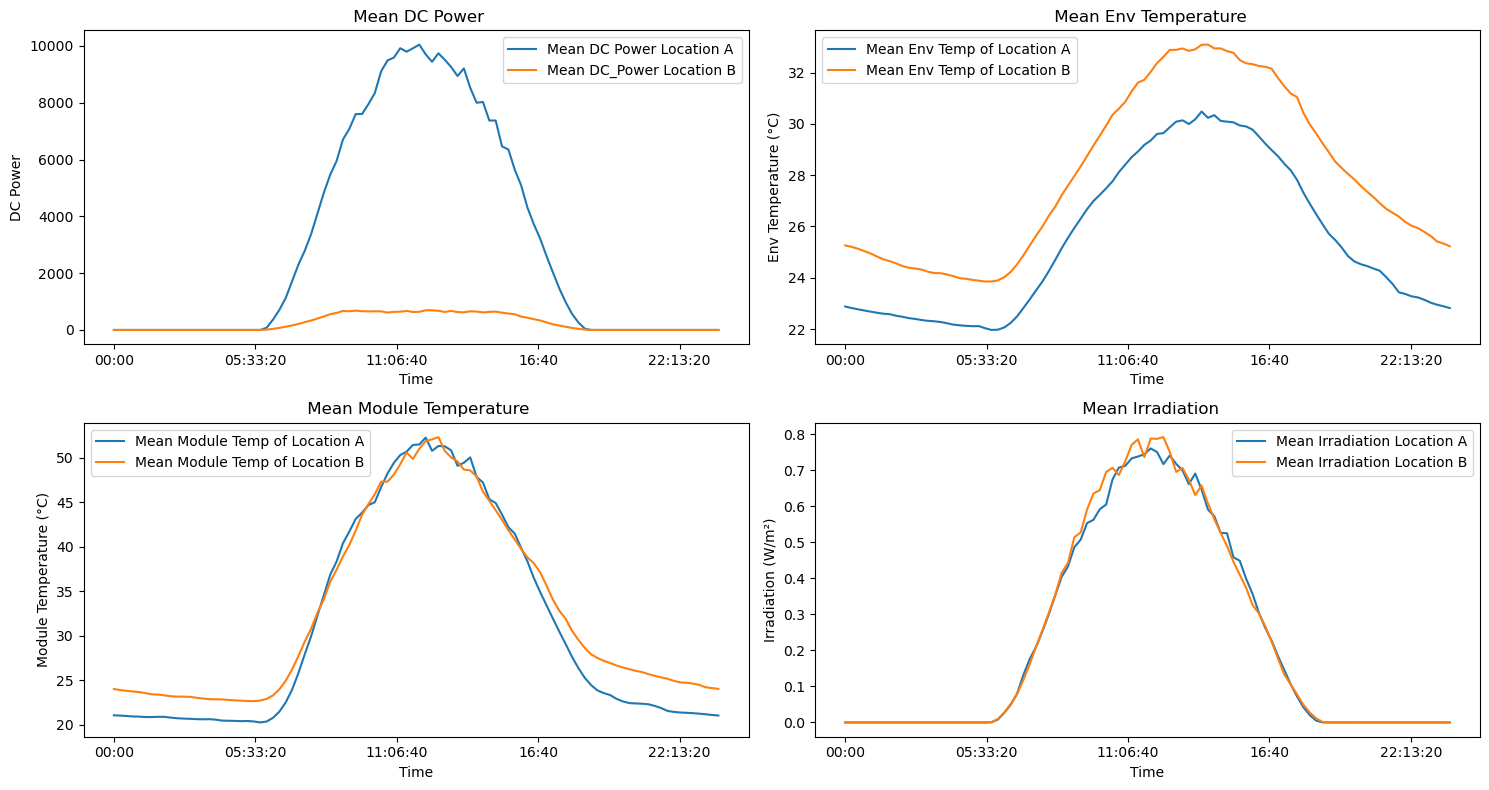

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

merged_A_df.groupby('TIME')['DC_POWER'].agg('mean').plot(ax=axes[0, 0],legend =True,label = 'Mean DC Power Location A')
merged_B_df.groupby('TIME')['DC_POWER'].agg('mean').plot(ax=axes[0, 0],legend =True,label = 'Mean DC_Power Location B')
axes[0, 0].set_title(' Mean DC Power')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('DC Power')

# mean module temperature for Location B on the second subplot 
merged_A_df.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(ax=axes[0, 1],legend =True,label = 'Mean Env Temp of Location A')
merged_B_df.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(ax=axes[0, 1],legend =True,label = 'Mean Env Temp of Location B')
axes[0, 1].set_title(' Mean Env Temperature')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Env Temperature (°C)')

#  mean irradiation for Location A on the third subplot 
merged_A_df.groupby('TIME')['MODULE_TEMPERATURE'].agg('mean').plot(ax=axes[1, 0],legend =True,label = 'Mean Module Temp of Location A')
merged_B_df.groupby('TIME')['MODULE_TEMPERATURE'].agg('mean').plot(ax=axes[1, 0], legend=True, label='Mean Module Temp of Location B')
axes[1, 0].set_title(' Mean Module Temperature')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Module Temperature (°C)')

# mean irradiation for Location B on the fourth subplot 
merged_A_df.groupby('TIME')['IRRADIATION'].agg('mean').plot(ax=axes[1, 1],legend =True,label = 'Mean Irradiation Location A')
merged_B_df.groupby('TIME')['IRRADIATION'].agg('mean').plot(ax=axes[1, 1], legend=True, label='Mean Irradiation Location B')
axes[1, 1].set_title(' Mean Irradiation')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Irradiation (W/m²)')

plt.tight_layout()
plt.show()


In [49]:
#Location mean AC power
solar_df.groupby(['LOCATION'])['AC_POWER'].mean()

LOCATION
A    307.802752
B    241.277825
Name: AC_POWER, dtype: float64

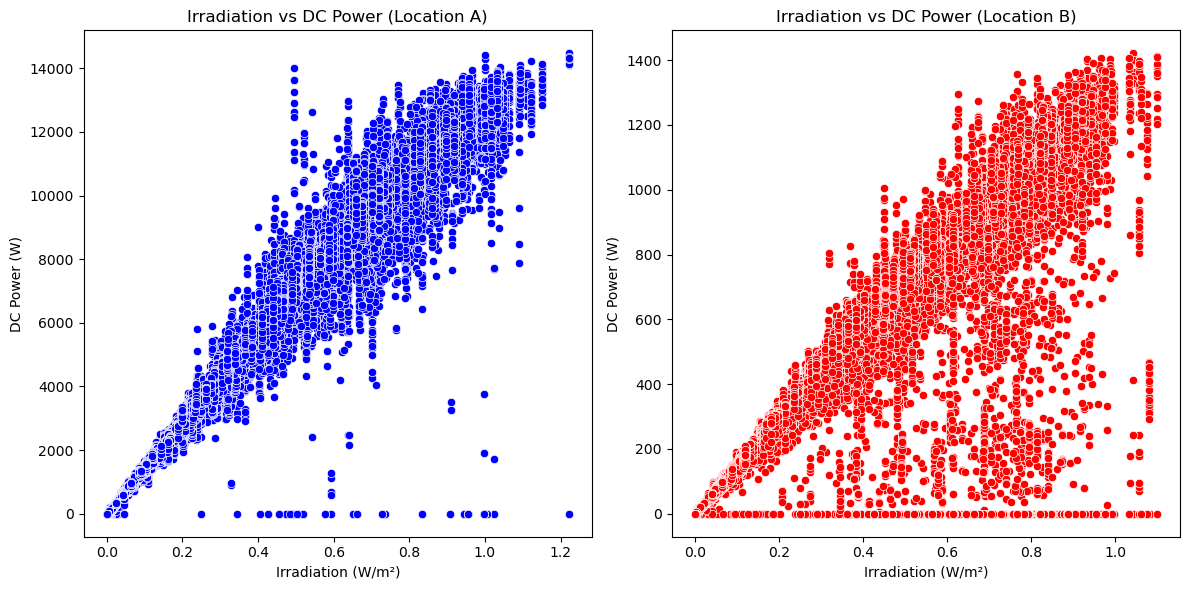

In [50]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Location A 
sns.scatterplot(x='IRRADIATION', y='DC_POWER', data=merged_A_df, ax=axes[0], color='blue')
axes[0].set_title('Irradiation vs DC Power (Location A)')
axes[0].set_xlabel('Irradiation (W/m²)')
axes[0].set_ylabel('DC Power (W)')

# Location B 
sns.scatterplot(x='IRRADIATION', y='DC_POWER', data=merged_B_df, ax=axes[1], color='red')
axes[1].set_title('Irradiation vs DC Power (Location B)')
axes[1].set_xlabel('Irradiation (W/m²)')
axes[1].set_ylabel('DC Power (W)')


plt.tight_layout()


plt.show()


In [51]:
#correlation 
correlationA = merged_A_df['IRRADIATION'].corr(merged_A_df['DC_POWER'])
correlationB = merged_B_df['IRRADIATION'].corr(merged_B_df['DC_POWER'])
print(f"Correlation for Location A: {correlationA}")
print(f"Correlation for Location B: {correlationB}")

Correlation for Location A: 0.9893910408878257
Correlation for Location B: 0.7809776682186579


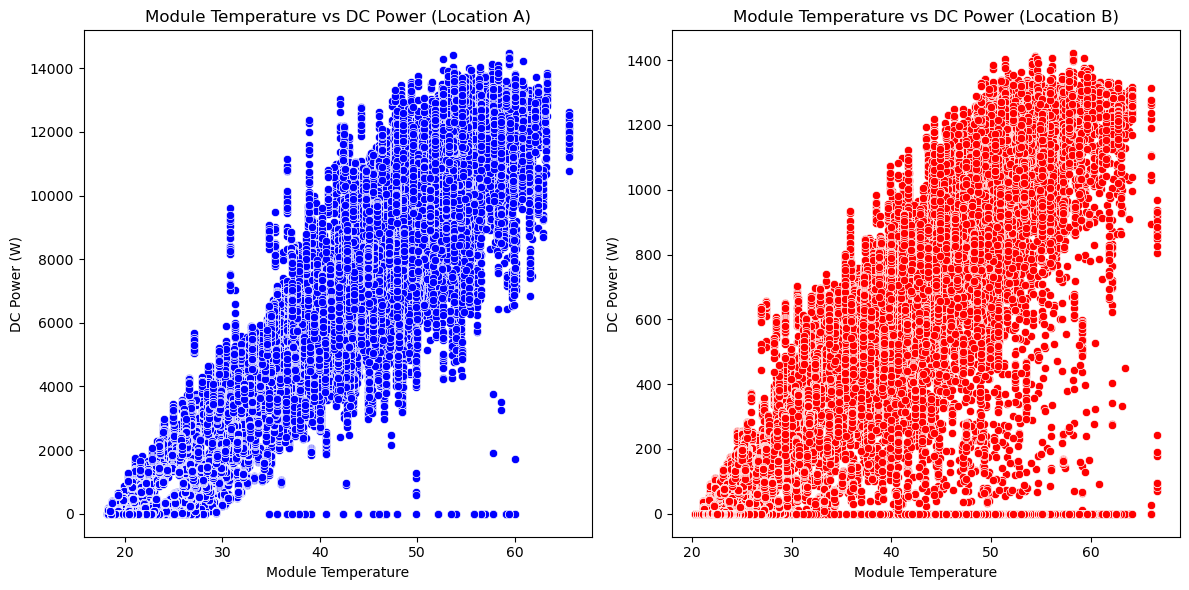

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Location A 
sns.scatterplot(x='MODULE_TEMPERATURE', y='DC_POWER', data=merged_A_df, ax=axes[0], color='blue')
axes[0].set_title('Module Temperature vs DC Power (Location A)')
axes[0].set_xlabel('Module Temperature')
axes[0].set_ylabel('DC Power (W)')

# Location B 
sns.scatterplot(x='MODULE_TEMPERATURE', y='DC_POWER', data=merged_B_df, ax=axes[1], color='red')
axes[1].set_title('Module Temperature vs DC Power (Location B)')
axes[1].set_xlabel('Module Temperature')
axes[1].set_ylabel('DC Power (W)')


plt.tight_layout()


plt.show()

In [53]:
correlationA = merged_A_df['MODULE_TEMPERATURE'].corr(merged_A_df['DC_POWER'])
correlationB = merged_B_df['MODULE_TEMPERATURE'].corr(merged_B_df['DC_POWER'])
print(f"Correlation for Location A: {correlationA}")
print(f"Correlation for Location B: {correlationB}")

Correlation for Location A: 0.9548110519171354
Correlation for Location B: 0.7496761720844368


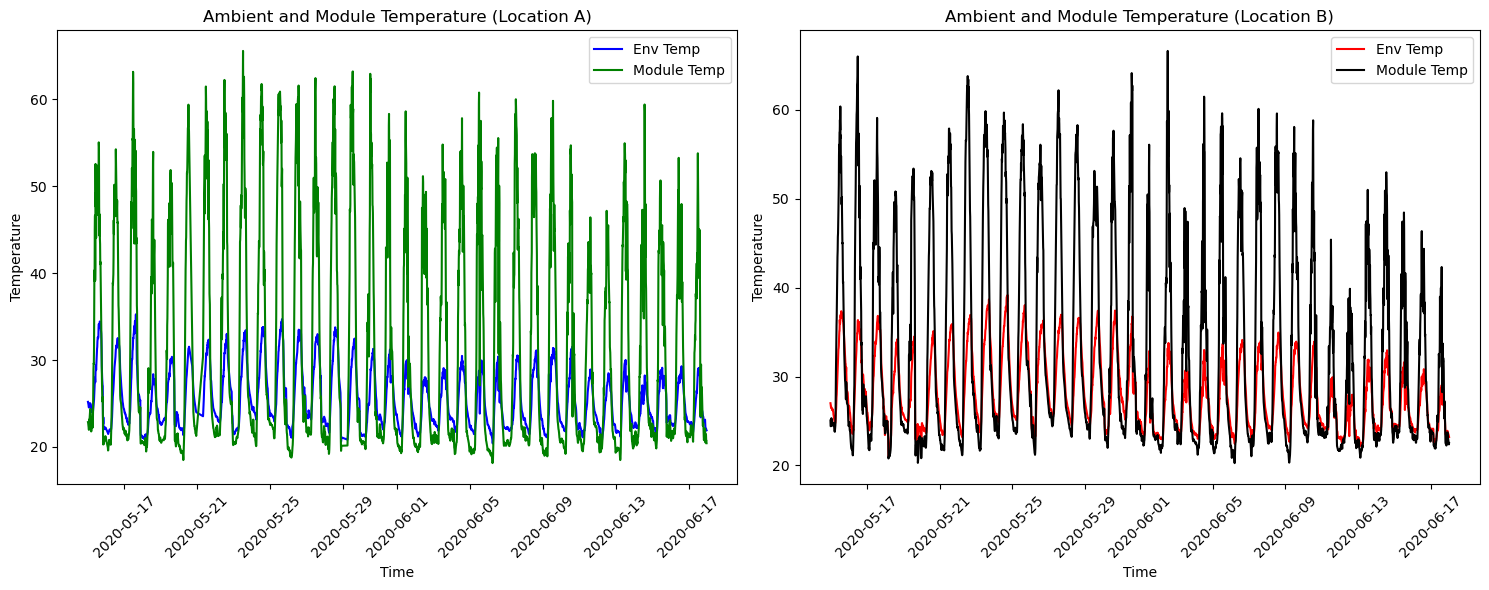

In [54]:
#create two subplots to visualize the Ambient and Module Temperatures over time for Location A and B.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

 
axes[0].plot(merged_A_df['DATE_TIME'], merged_A_df['AMBIENT_TEMPERATURE'], color='blue', label='Env Temp')
axes[0].plot(merged_A_df['DATE_TIME'], merged_A_df['MODULE_TEMPERATURE'], color='green', label='Module Temp')
axes[0].set_title('Ambient and Module Temperature (Location A)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Temperature')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  


axes[1].plot(merged_B_df['DATE_TIME'], merged_B_df['AMBIENT_TEMPERATURE'], color='red', label='Env Temp')
axes[1].plot(merged_B_df['DATE_TIME'], merged_B_df['MODULE_TEMPERATURE'], color='black', label='Module Temp')
axes[1].set_title('Ambient and Module Temperature (Location B)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Temperature')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45) 


plt.tight_layout()
plt.show()



#### Efficiency of Inverter

In [55]:

solar_dc_power = merged_A_df[merged_A_df['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = merged_B_df[merged_B_df['AC_POWER'] > 0]['AC_POWER'].values

In [56]:
def analyze_inverter_efficiency(df_solar):
    # filter valid data
    valid_data = df_solar[(df_solar['DC_POWER'] > 0) & (df_solar['AC_POWER'] > 0) & (df_solar['AMBIENT_TEMPERATURE'] > 0)]
    solar_dc_power = valid_data['DC_POWER'].values
    solar_ac_power = valid_data['AC_POWER'].values
    ambient_temperature = valid_data['AMBIENT_TEMPERATURE'].values
    inverter_efficiency = (solar_ac_power / solar_dc_power) * 100
    
    # erform LOWESS smoothing
    smoothed_line = sm.nonparametric.lowess(inverter_efficiency, ambient_temperature, frac=0.3)
    smoothed_temp = smoothed_line[:, 0]
    smoothed_efficiency = smoothed_line[:, 1]
    
    # filter smoothed data for temperatures < 30
    below_30_indices = smoothed_temp < 30
    filtered_temp = smoothed_temp[below_30_indices]
    filtered_efficiency = smoothed_efficiency[below_30_indices]
    
    # Find the maximum efficiency point before 30°C
    max_efficiency_idx = np.argmax(filtered_efficiency)
    max_temp = filtered_temp[max_efficiency_idx]
    max_efficiency = filtered_efficiency[max_efficiency_idx]
    
    # Output Results
    print(f"Maximum Efficiency Point (Temp < 30°C): Temperature = {max_temp}°C, Efficiency = {max_efficiency:.2f}%")
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(ambient_temperature, inverter_efficiency, color='blue', alpha=0.5, label='Data points')
    plt.plot(smoothed_temp, smoothed_efficiency, color='red', lw=2, label='Smoothed line')
    plt.scatter(max_temp, max_efficiency, color='green', s=100, label=f'Maximum Efficiency ({max_efficiency:.2f}%)', zorder=5)
    plt.axvline(x=30, color='orange', linestyle='--', label='30°C Threshold')
    plt.title('Inverter Efficiency vs. Ambient Temperature')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('Inverter Efficiency (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Maximum Efficiency Point (Temp < 30°C): Temperature = 24.477518733333334°C, Efficiency = 9.80%


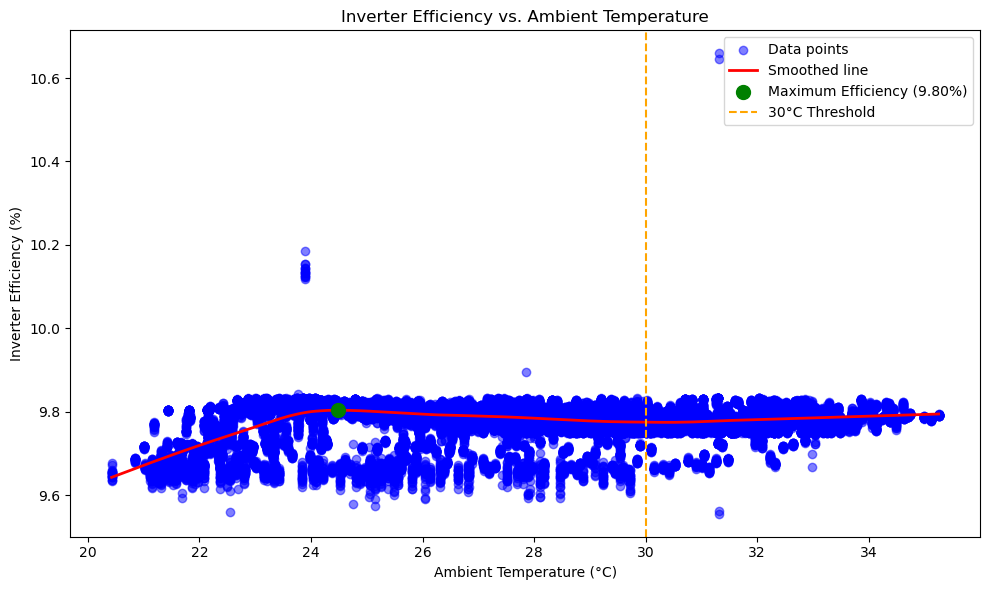

In [57]:
analyze_inverter_efficiency(merged_A_df)

Maximum Efficiency Point (Temp < 30°C): Temperature = 26.917700241379308°C, Efficiency = 98.01%


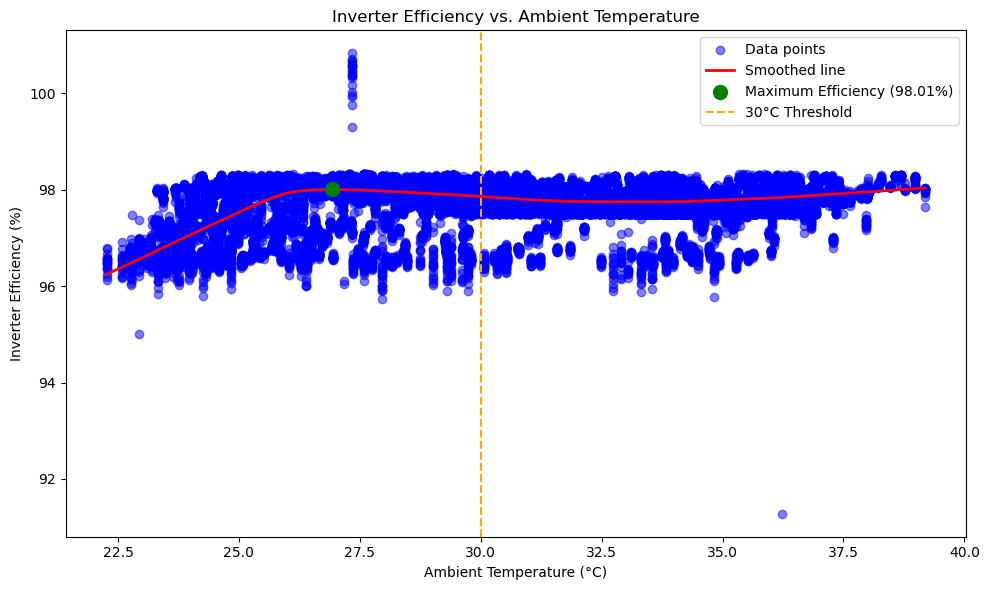

In [58]:
analyze_inverter_efficiency(merged_B_df)